In [1]:
import sys
print(sys.executable)

/Users/arshia/opt/anaconda3/envs/datascraping/bin/python


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df_base = pd.read_csv("/Users/arshia/Downloads/crop_yield.csv")

In [4]:
df_base.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [5]:
df_base.info() # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [6]:
df_base.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


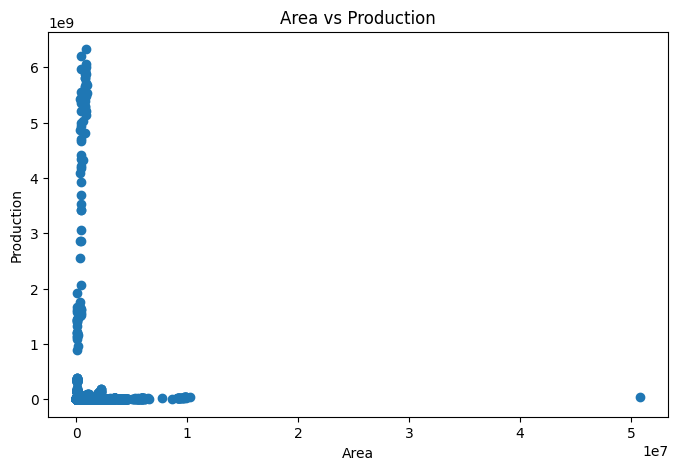

In [7]:
#Plot the distributions of numerical features
plt.figure(figsize=(8,5))
plt.scatter(df_base['Area'], df_base['Production'])
plt.xlabel('Area')
plt.ylabel('Production')
plt.title('Area vs Production')
plt.show()

In [8]:
df_base = df_base[df_base['Area']>1] # Removing rows with Area less than 1 to avoid outliers
df_base = df_base[df_base['Area']<20000000] # Removing rows with Area greater than 20 million to avoid outliers
    
df_base.reset_index(drop=True, inplace=True)

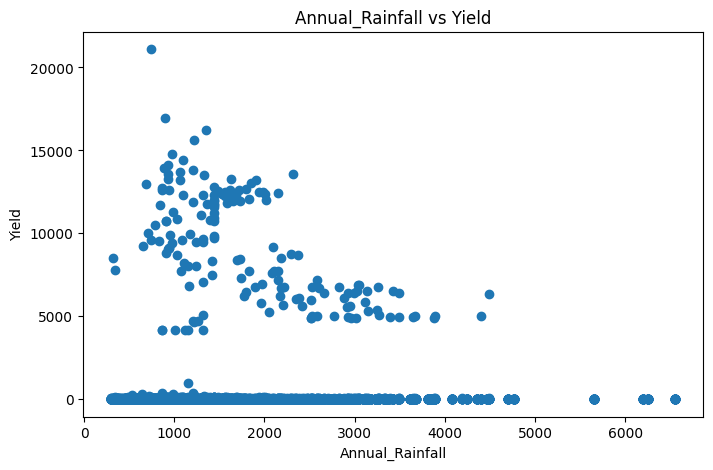

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(df_base['Annual_Rainfall'], df_base['Yield'])
plt.xlabel('Annual_Rainfall')
plt.ylabel('Yield')
plt.title('Annual_Rainfall vs Yield')
plt.show()

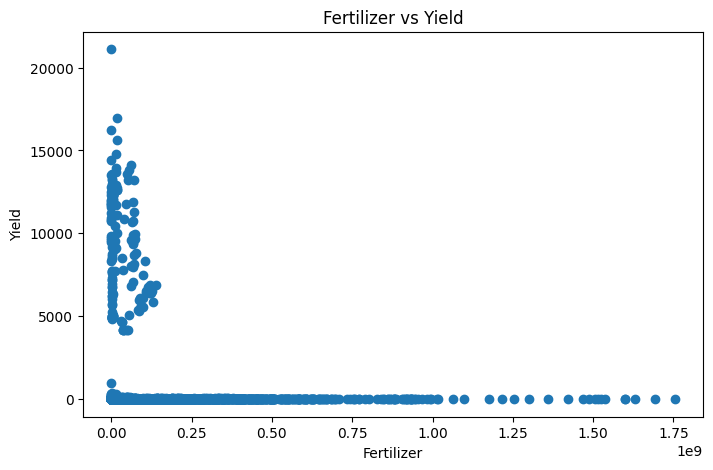

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(df_base['Fertilizer'], df_base['Yield'])
plt.xlabel('Fertilizer')
plt.ylabel('Yield')
plt.title('Fertilizer vs Yield')
plt.show()

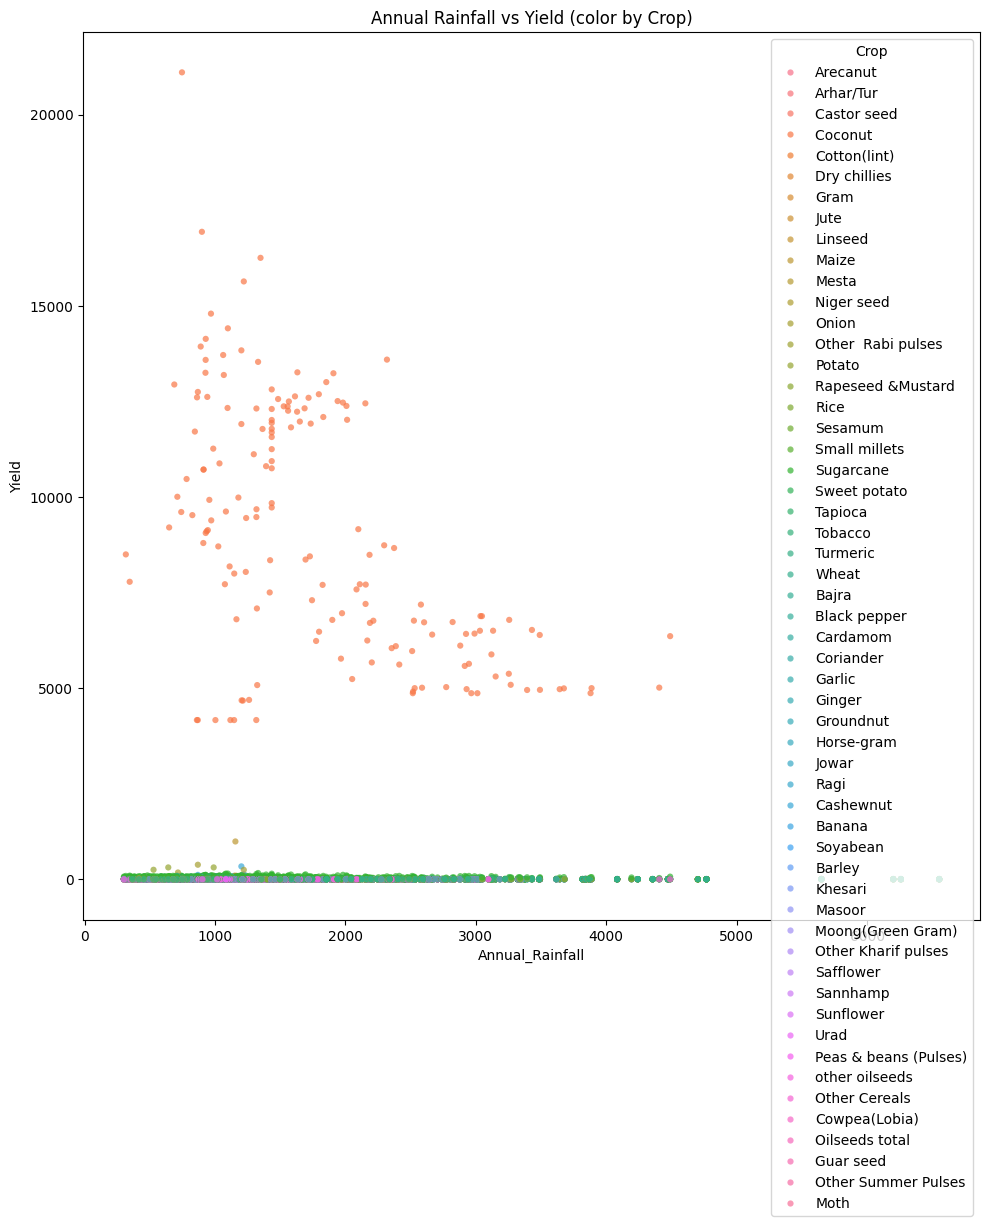

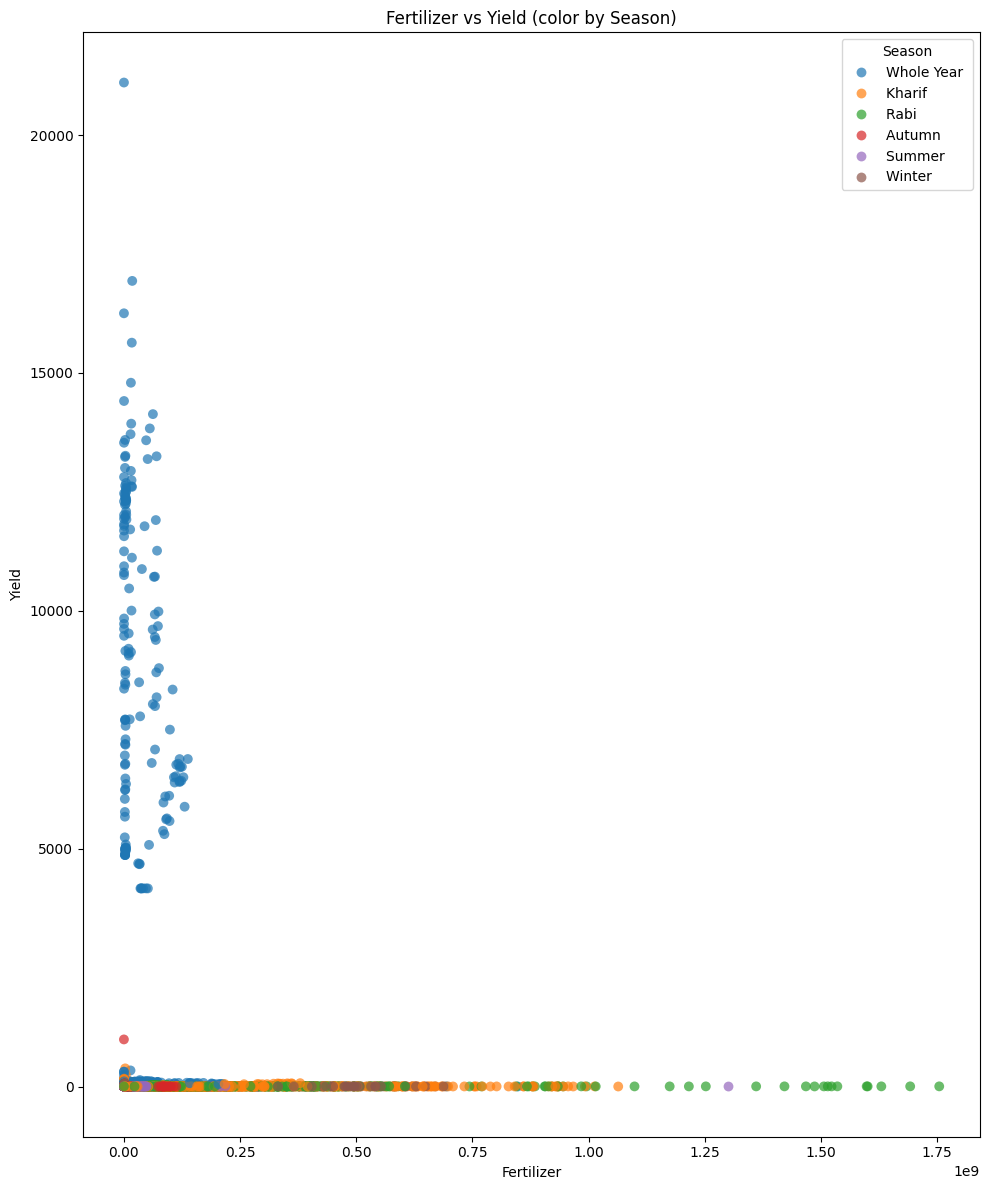

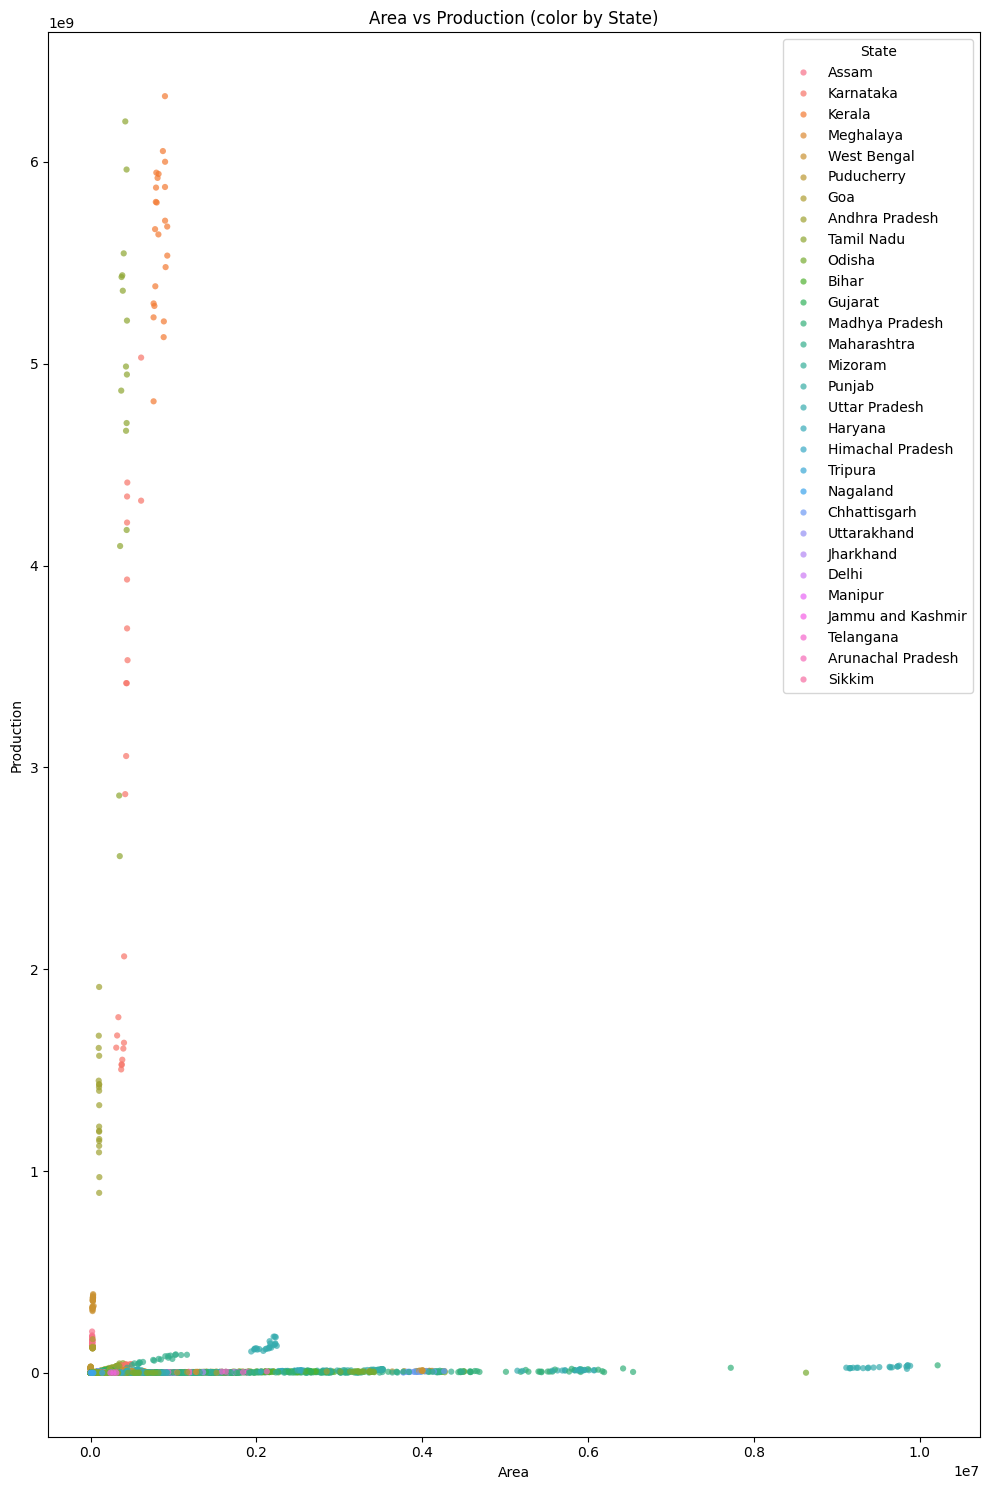

In [11]:
plt.figure(figsize=(10,12))
sns.scatterplot(
    data=df_base,
    x='Annual_Rainfall',
    y='Yield',
    hue='Crop',
    s=20,
    alpha=0.7,
    linewidth=0
)
plt.title('Annual Rainfall vs Yield (color by Crop)')
plt.tight_layout()
plt.show()


# Fertilizer vs Yield (color by Season)
plt.figure(figsize=(10,12))
sns.scatterplot(
    data=df_base,
    x='Fertilizer',
    y='Yield',
    hue='Season',
    s=50,
    alpha=0.7,
    linewidth=0
)
plt.title('Fertilizer vs Yield (color by Season)')
plt.tight_layout()
plt.show()


# Area vs Production (color by State)
plt.figure(figsize=(10,15))
sns.scatterplot(
    data=df_base,
    x='Area',
    y='Production',
    hue='State',
    s=20,
    alpha=0.7,
    linewidth=0
)
plt.title('Area vs Production (color by State)')
plt.tight_layout()
plt.show()

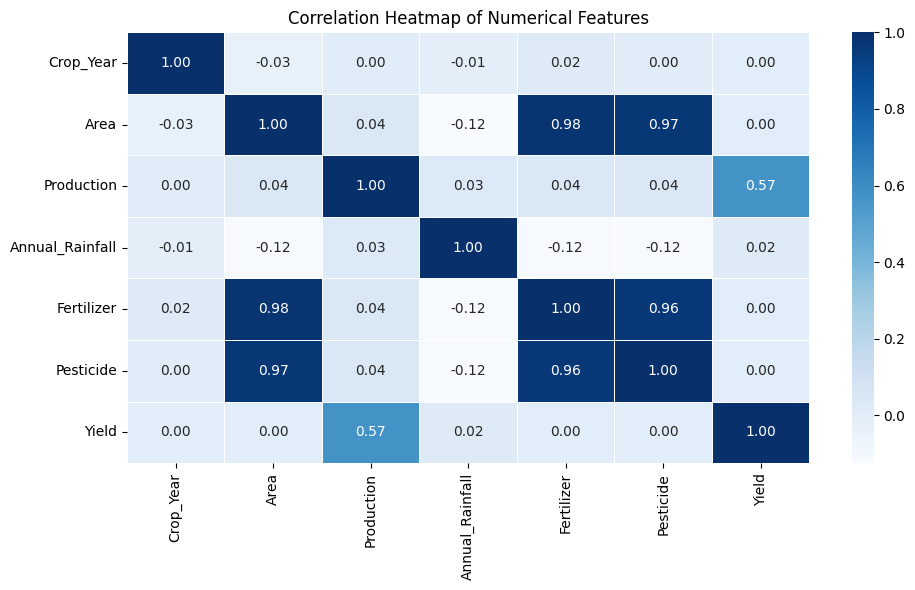

In [12]:
numeric_df = df_base.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='Blues',
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

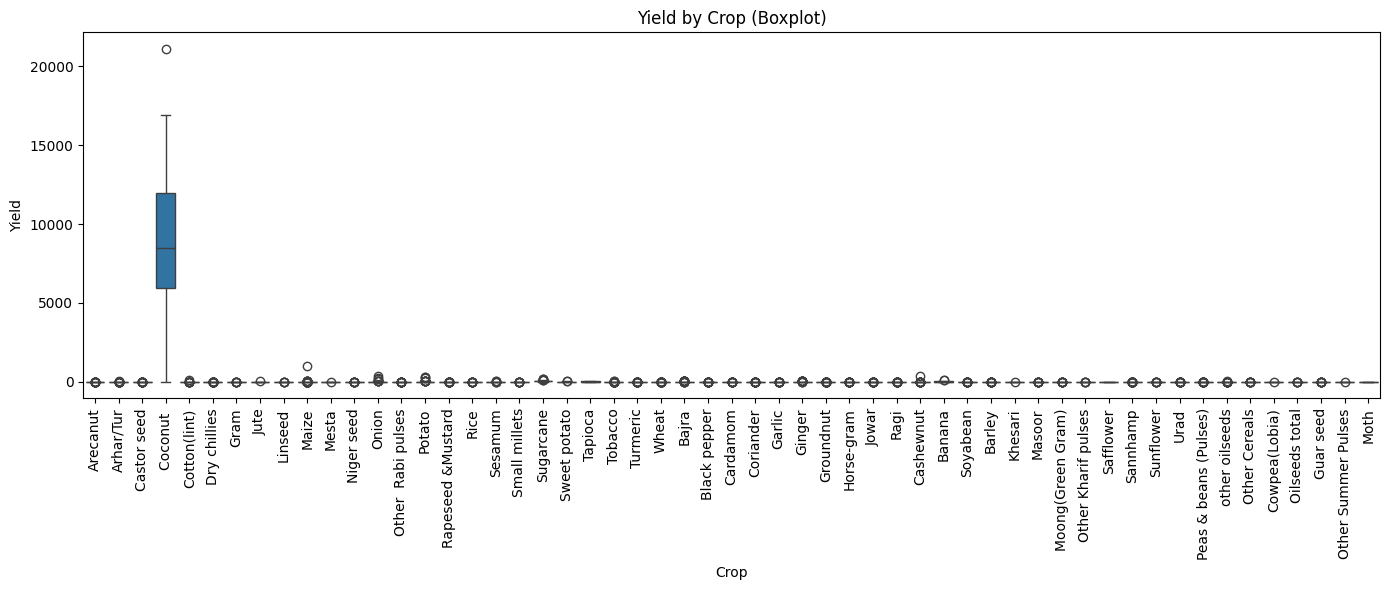

In [13]:
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_base,
    x="Crop",
    y="Yield"
)

plt.xticks(rotation=90)
plt.title("Yield by Crop (Boxplot)")
plt.tight_layout()
plt.show()

In [14]:
# Set to lower case for consistency
df_base.columns = [col.lower() for col in df_base.columns]

In [15]:
# drop area and production to aviod leakage
df_base = df_base.drop(columns=["area", "production"])

In [20]:
# transform categorical variables using one-hot encoding 0 and 1
df_encoded = pd.get_dummies(df_base, drop_first=True, dtype=int)
df_encoded.head()

,crop_year,annual_rainfall,fertilizer,pesticide,yield,crop_Arhar/Tur,crop_Bajra,crop_Banana,crop_Barley,crop_Black pepper,...,state_Odisha,state_Puducherry,state_Punjab,state_Sikkim,state_Tamil Nadu,state_Telangana,state_Tripura,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal
0,1997,2051.4,7024878.38,22882.34,0.796087,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1997,2051.4,631643.29,2057.47,0.710435,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1997,2051.4,75755.32,246.76,0.238333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1997,2051.4,1870661.52,6093.36,5238.051739,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1997,2051.4,165500.63,539.09,0.420909,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Set final df
df = df_encoded.sort_values(by="crop_year").reset_index(drop=True)

# Features and target prediction in variables
X = df.drop(columns=["yield"])
y = df["yield"]

In [18]:
# Time-based split: 80% train, 20% test to avoid leacking future information
split_index = int(len(df) * 0.80)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]

In [19]:
# Training a Linear Regression model baseline
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict on test set
y_pred = model.predict(X_test)

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

MAE : 56.0258
MSE : 85794.9394
RMSE: 292.9077
R²  : 0.8780


In [23]:
# Set feature importance
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coef_df.head(10))

                    Feature  Coefficient
12            crop_Coconut   8597.036593
68                state_Goa  -329.044514
75             state_Kerala  -184.573076
66       state_Chhattisgarh  -122.060783
64              state_Assam  -113.499671
80            state_Mizoram   -85.903538
74          state_Karnataka   -79.955690
79          state_Meghalaya   -74.078612
63  state_Arunachal Pradesh   -73.167424
83         state_Puducherry    66.375088


In [24]:
X_train, X_test
y_train, y_test

(0         0.000000
 1         1.661111
 2         1.825000
 3         0.628333
 4         1.886667
            ...    
 15653     2.272381
 15654     1.996897
 15655     1.245455
 15656    43.710909
 15657     0.843333
 Name: yield, Length: 15658, dtype: float64,
 15658    1.083636
 15659    0.624444
 15660    0.615000
 15661    1.453333
 15662    9.126364
            ...   
 19568    6.603478
 19569    1.366923
 19570    0.870000
 19571    1.973077
 19572    1.521667
 Name: yield, Length: 3915, dtype: float64)

In [29]:
from sklearn.model_selection import train_test_split

# 20% of train becomes validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False  # keep time order
)

In [30]:
# Training set
train_df = X_train_final.copy()
train_df['yield'] = y_train_final

# Validation set
val_df = X_val.copy()
val_df['yield'] = y_val

# Test set
test_df = X_test.copy()
test_df['yield'] = y_test

In [31]:
train_df.to_csv("/Users/arshia/Downloads/train.csv", index=False)
val_df.to_csv("/Users/arshia/Downloads/val.csv", index=False)
test_df.to_csv("/Users/arshia/Downloads/test.csv", index=False)

print("Train/Validation/Test CSVs saved locally!")

Train/Validation/Test CSVs saved locally!
